# **Evaluation Process**

Here we are starting our evaluation process.

Our target is to calculate the confusion matrix, precison, accuracy, recall and f-measure of our test results.

First, we need to import needed libraries as below 

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

Setting up Plot Confusion Matrix Class
Then, we define a ***plot_confusion_matrix*** class here to be used for drawing the confusion matrix

Parameters' meanings:
1.   cm: For calculating the value of the confusion matrix cell
2.   classes: All results' kinds. Telling what our result will be
3.   normalize: True for showing the percentage, False for showing the counts
4. title:The name of our confusion matrix
5. cmap: The color used in our confusion matrix cell




In [ ]:
# draw a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    - cm :  calculate the value of the confusion matrix
    - classes : class for every row/column
    - normalize : True:show percentage, False:show counts
    """
    if normalize:   #for calculating the percentage
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("show percentage：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
        print(cm)
    else:    #the number of the results
        print('show specific number：')
        print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #interpolation = 'nearest': when the display resolution is different with our image,
    #our script will output the image without adding other values between pixels.
    #https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
    plt.title(title) # adding our title 
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)#deciding what labels will be shown on x axis
    plt.yticks(tick_marks, classes)# deciding what labels will be shown on y axis
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')  #y axis label
    plt.xlabel('Predicted label')  #x axis label
    plt.show()


Of course! We can't plot anything without data. Therefore, for showing the effect, here a sample data is offered. It should be changed when this evaluation script is combined with any other learning models.

In [ ]:
nf_matrix = np.array([[187,2,1,5,5],
                      [12,176,2,7,3],
                      [0,0,198,2,0],
                      [6,5,4,173,12],
                      [1,3,1,9,186]])
attack_types = ['Cloth_mask', 'No_face_mask', 'Surgical_mask', 'K95_mask', 'mask_worn_incorrectly']


Time to show our Mr.Confunsion matrix, here we put our ***cnf_matrix*** and ***attack_types*** into our function, Setting ***normalize*** as ***True*** and ***'Normalized confusion matrix'*** as its name

In [ ]:
plot_confusion_matrix(cnf_matrix, classes=attack_types, normalize=True, title='Normalized confusion matrix')

Let's recall the formula for calculating required values

In [ ]:
"""
precision=TP/(TP+FP)
accuracy=(TP+TN)/(TP+TN+FP+FN)
recall=TP/(TP+FN)
f-measure=2*(Precision*Recall)/(Precision+Recall)
"""

Then apply data above to our formula.

In [ ]:
cloth_mask=cnf_matrix[0]
No_face_mask=cnf_matrix[1]
Surgical_mask=cnf_matrix[2]
K95_mask=cnf_matrix[3]
mask_worn_incorrectly=cnf_matrix[4]

#for convinience , I use the specific number here. It will be changed later
#For cloth_mask
precision1=187/(187+12+0+6+1)
accuracy=(187+176+198+173+186)/1000
recall1=187/(187+2+1+5+5)
fm1=2*(precision1*recall1)/(precision1+recall1)
print("accuracy: ",accuracy)
print("\n\n\n\n\n\n")
print("precision 1: ",precision1)
print("recall 1: ",recall1)
print("fm 1: ",fm1)
#For No_face_mask
precision2=176/(2+176+0+5+3)
recall2=176/(12+176+2+7+3)
fm2=2*(precision2*recall2)/(precision2+recall2)
print("precision 2: ",precision2)
print("recall 2: ",recall2)
print("fm 2: ",fm2)
#For Surgical_mask
precision3=198/(1+2+198+4+1)
recall3=198/(0+0+198+2+0)
fm3=2*(precision3*recall3)/(precision3+recall3)
print("precision 3: ",precision3)
print("recall 3: ",recall3)
print("fm 3: ",fm3)
#For K95_Mask
precision4=173/(5+7+2+173+9)
recall4=173/(6+5+4+173+12)
fm4=2*(precision4*recall4)/(precision4+recall4)
print("precision 4: ",precision4)
print("recall 4: ",recall4)
print("fm 4: ",fm4)
#For mask_worn_incorrectly
precision5=186/(5+3+0+12+186)
recall5=186/(1+3+1+9+186)
fm5=2*(precision5*recall5)/(precision5+recall5)
print("precision 5: ",precision5)
print("recall 5: ",recall5)
print("fm 5: ",fm5)

Finally, show them in a nice format!

In [ ]:

name_list = ['Cloth_mask', 'No_mask', 'Surgical', 'K95', 'incorrectly']
precision = [precision1, precision2, precision3, precision4, precision5]
recall = [recall1, recall2, recall3, recall4, recall5]
fm = [fm1, fm2, fm3, fm4, fm5]
x = list(range(len(precision)))
total_width, n = 0.4, 2
width = total_width / n

plt.bar(x, precision, width=width, label='precision', fc='y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, recall, width=width, label='recall', tick_label=name_list, fc='r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, fm, width=width, label='fmeasure', tick_label=name_list, fc='b')


plt.legend()  #add example
plt.show() #show the result


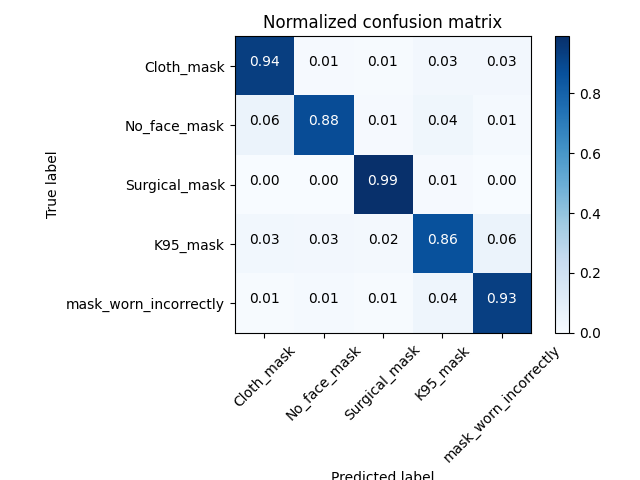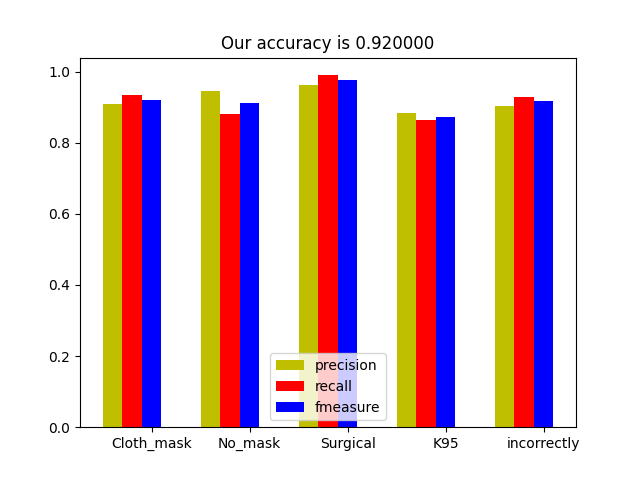